In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mitburu-cpu/Estadistica2025B/refs/heads/main/Proyecto%20u1%20est.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


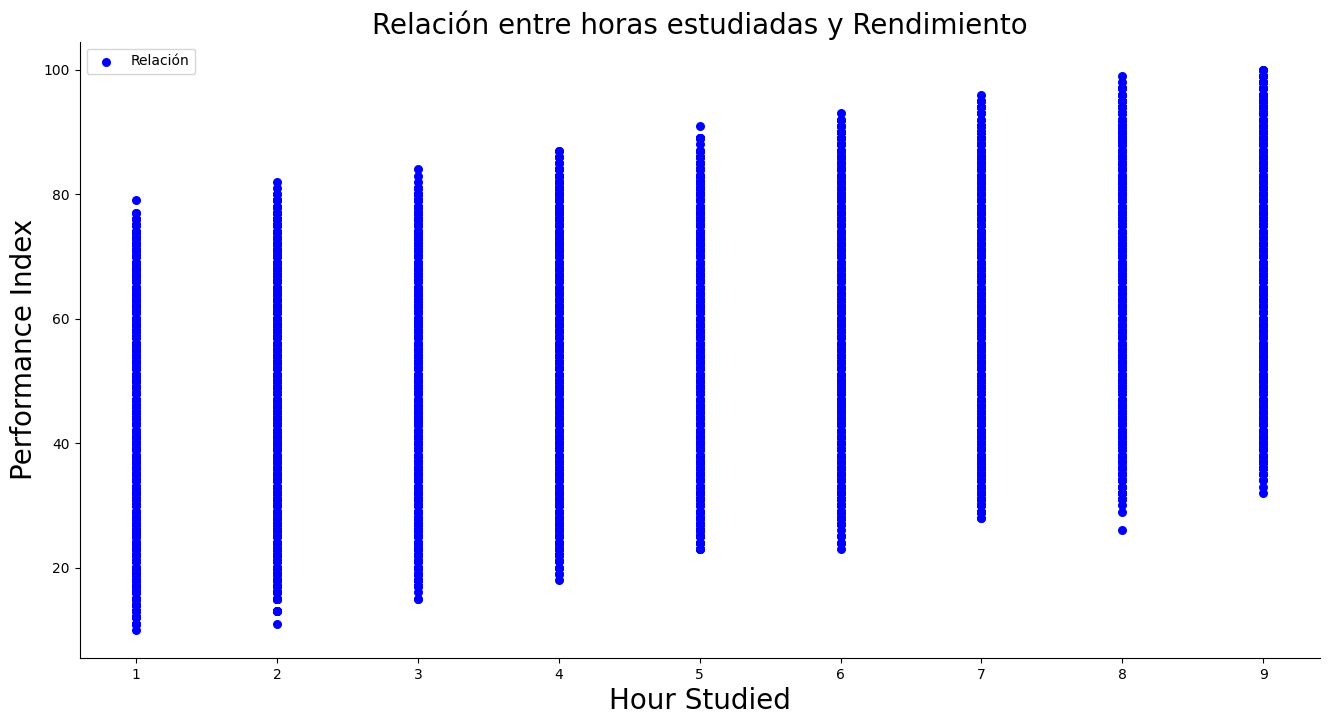

coef.corr= PearsonRResult(statistic=np.float64(0.3737303506987237), pvalue=np.float64(0.0))
parámetros:  Intercept             41.379175
Q("Hours Studied")     2.773063
dtype: float64


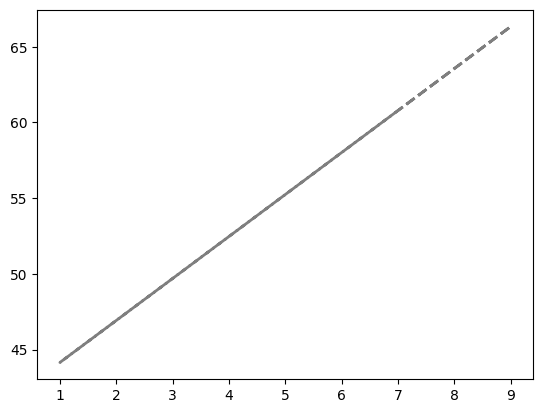


coeficiente de determinación= 0.1397

intervalo_de_confianza:                             0          1
Intercept           40.620341  42.138008
Q("Hours Studied")   2.638143   2.907983


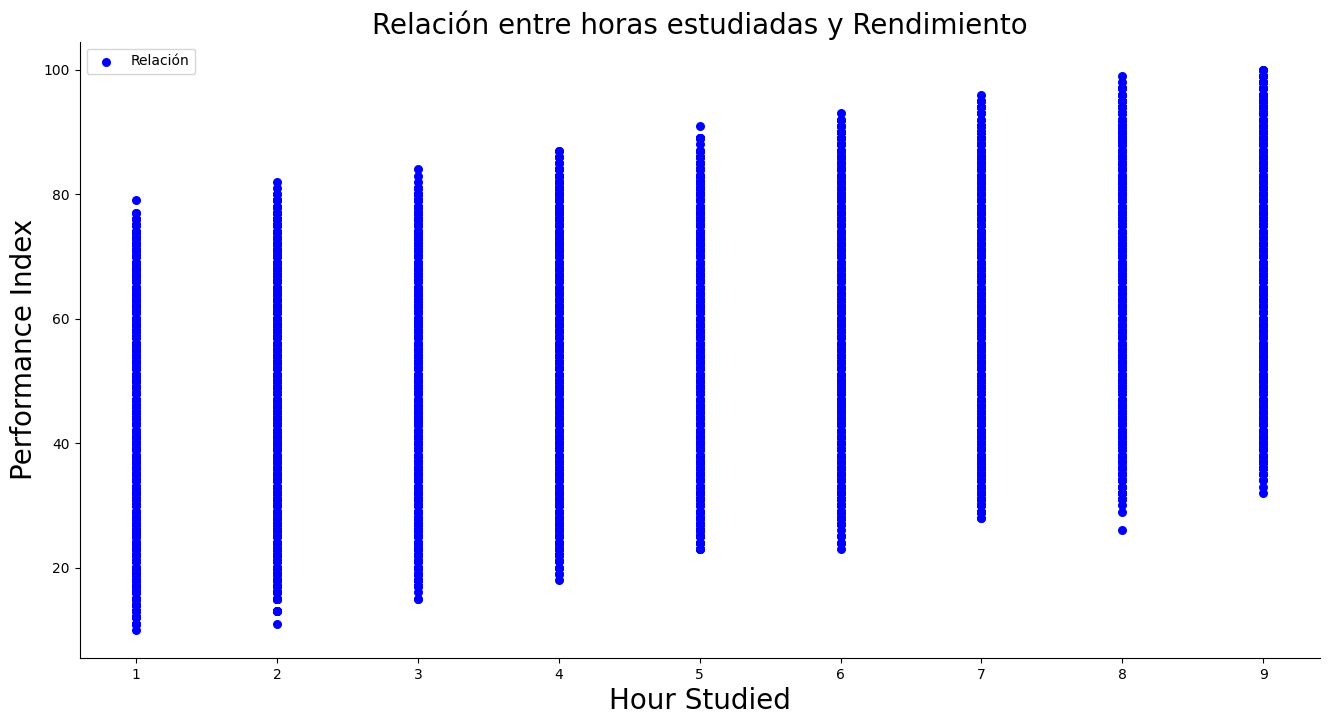

valor-p(shapiro)= 2.3269507843403982e-45
valor_p de Breusch-Pagan:  0.9742



/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


,df,sum_sq,mean_sq,F,PR(>F)
"Q(""Hours Studied"")",1.0,5.155178e+05,515517.816522,1623.181225,0.0
Residual,9998.0,3.175337e+06,317.597203,NaN,NaN


In [21]:
y = df["Performance Index"]
x = df["Hours Studied"]
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8) ,dpi=100)
plt.scatter(x,y, label = "Relación", color = "blue", s=30)

plt.xlabel("Hour Studied", fontsize=20)
plt.ylabel("Performance Index", fontsize=20)
plt.title("Relación entre horas estudiadas y Rendimiento", fontsize=20)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.legend()
plt.show()

from scipy.stats import pearsonr
r= pearsonr(x, y)
print("coef.corr=", pearsonr(x, y))
from sklearn.metrics import r2_score
import statsmodels.api as sm
x_constante=sm.add_constant(x)
# Change this line to use ols
modelo = sm.formula.ols('Q("Performance Index") ~ Q("Hours Studied")', data=df).fit()
print("parámetros: ",modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x,yc, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\ncoeficiente de determinación=",round(r2,4))

intervalo_de_confianza=modelo.conf_int(alpha=0.05)
print("\nintervalo_de_confianza:",intervalo_de_confianza)

residuales=modelo.resid
plt.figure(figsize=(16,8) ,dpi=100)
plt.scatter(x,y, label = "Relación", color = "blue", s=30)
plt.xlabel("Hour Studied", fontsize=20)
plt.ylabel("Performance Index", fontsize=20)
plt.title("Relación entre horas estudiadas y Rendimiento", fontsize=20)
plt.gca().spines[["top", "right"]].set_visible(False)
plt.legend()
plt.show()

from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro=shapiro(residuales)
print("valor-p(shapiro)=", valor_p_shapiro)

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

from statsmodels.formula.api import ols
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova